In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

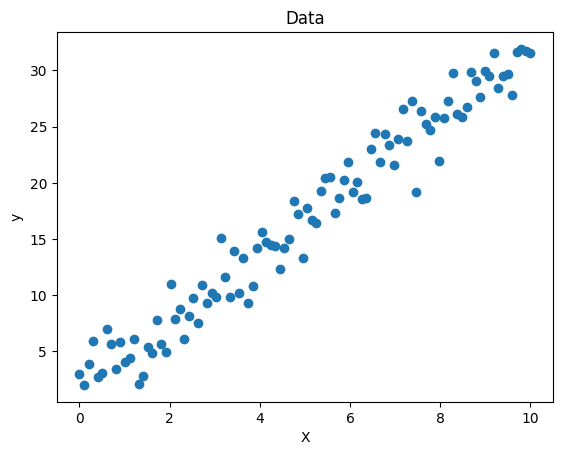

In [ ]:

# ! setting up dataset
n = 100 # - number of data points
X = np.linspace(0, 10, n) # - x values

# y = wx + b
true_slope = 3.0
true_intercept = 2.0

noise = 2.0 # - setting noise for the data, larger = more random
gen_noise = np.random.normal(0, noise, size=n) # - noise centered around 0 for every data point

y = true_slope * X + true_intercept + gen_noise

plt.scatter(X, y)
plt.title('Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:

# ! to return our models prediction of y hat
def predict(X, slope, intercept):
  return slope * X + intercept

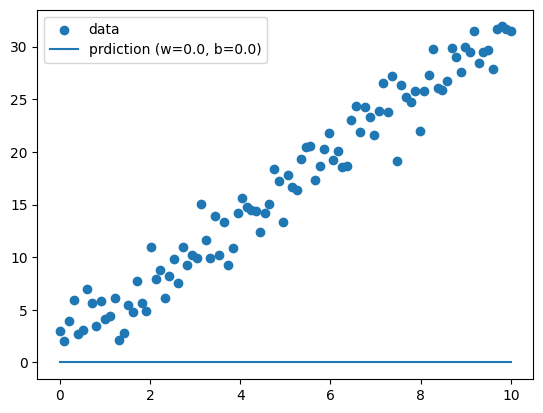

In [5]:

# ! starting values for our model
slope = 0.0
intercept = 0.0

y_hat = predict(X, slope, intercept)

plt.scatter(X, y, label='data')
plt.plot(X, y_hat, label=f'prdiction (w={slope}, b={intercept})')
plt.legend()

In [ ]:

# ! calculate loss using MSE
# * MSE = average of squared differences between the actual and predicted
# * it's squared to avoid negatives and to punish bigger errors

def mse(y_real, y_pred):
    return np.mean((y_real - y_pred) ** 2)

print('Initial loss:', mse(y, y_hat))
# Initial loss: 363.17000542803237 -> very high

Initial loss: 363.17000542803237


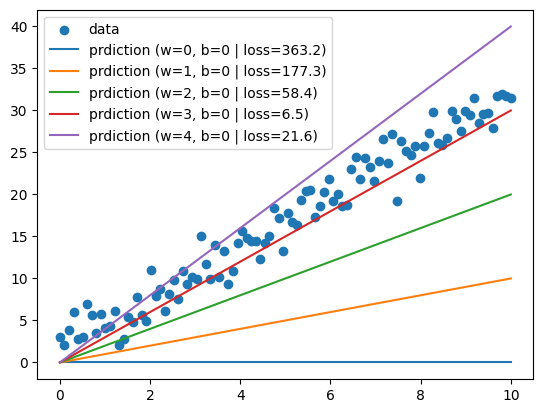

In [9]:

# ! trying out different lines
plt.scatter(X, y, label="data")

for slpe in range(5):
    y_try = predict(X, slpe, 0.0)
    
    plt.plot(X, y_try, label=f'prdiction (w={slpe}, b=0 | loss={mse(y, y_try):.1f})')

plt.legend()
plt.show()


In [10]:

# ! compute gradient
# * it will be in the direction of steepest ascent (we want descent)
def gradient(X, y, slope, intercept):
    n = len(X)
    
    y_hat = predict(X, slope, intercept)
    
    # ^ these functions come from taking the partial derivatives of the loss function (MSE)
    d_slope = (2 / n) * np.sum((y_hat - y) * X)
    d_intercept = (2 / n) * np.sum((y_hat - y))
    
    return d_slope, d_intercept     # * this is the gradient

In [13]:

# ! doing one gradient descent step
slope = 0.0
intercept = 0.0

learning_rate = 0.001   # - step size

old_loss = mse(y, predict(X, slope, intercept))
d_slope, d_intercept = gradient(X, y, slope, intercept)

# * subtraction to go in the 'descent' direction, multiply by learning_rate for small steps
new_slope = slope - d_slope * learning_rate
new_intercept = intercept - d_intercept * learning_rate

new_loss = mse(y, predict(X, new_slope, new_intercept))

print('Old slope, old intercept:', slope, intercept)
print('d_slope, d_intercept:', d_slope, d_intercept)
print('New slope, new intercept:', new_slope, new_intercept)
print('Old loss:', old_loss)
print('New loss:', new_loss)


Old slope, old intercept: 0.0 0.0
d_slope, d_intercept: -219.40223463562063 -33.58461393042362
New slope, new intercept: 0.21940223463562064 0.03358461393042362
Old loss: 363.17000542803237
New loss: 315.59223383998074


In [16]:

# ! defining the training function
def train(X, y, learning_rate=0.001, epochs=3000, print_every=300):
    # * epochs is how many times we will loop through
    
    slope = 0.0
    intercept = 0.0
    
    history = []
    
    for epoch in range(epochs):
        y_hat = predict(X, slope, intercept)
        
        loss = mse(y, y_hat)
        history.append(loss)
        
        d_slope, d_intercept = gradient(X, y, slope, intercept)
        
        slope -= learning_rate * d_slope
        intercept -= learning_rate * d_intercept
        
        if epoch % print_every == 0:
            print(f'epoch {epoch:4d} | loss={loss:.3f} | slope={slope:.3f} | intercept={intercept:.3f}')
            
    return slope, intercept, history
        
        

In [ ]:

# ! train the model
slope, intercept, history = train(X, y, learning_rate=0.001, epochs=3000, print_every=300)

print('\nFinal parameters:')
print('slope=', slope)
print('intercept=', intercept)

epoch    0 | loss=363.170 | slope=0.219 | intercept=0.034
epoch  300 | loss=3.519 | slope=3.179 | intercept=0.645
epoch  600 | loss=3.452 | slope=3.158 | intercept=0.784
epoch  900 | loss=3.402 | slope=3.140 | intercept=0.905
epoch 1200 | loss=3.366 | slope=3.125 | intercept=1.008
epoch 1500 | loss=3.338 | slope=3.111 | intercept=1.098
epoch 1800 | loss=3.318 | slope=3.100 | intercept=1.175
epoch 2100 | loss=3.303 | slope=3.090 | intercept=1.241
epoch 2400 | loss=3.292 | slope=3.081 | intercept=1.298
epoch 2700 | loss=3.284 | slope=3.074 | intercept=1.348

Final parameters:
slope= 3.067341011887882
intercept= 1.3899793141382977


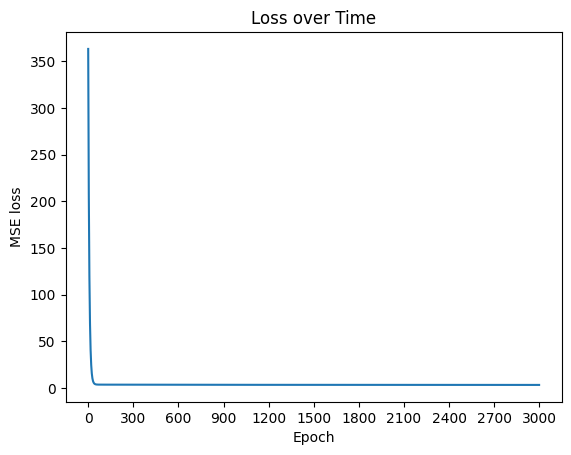

In [21]:

# ! show the training process
plt.plot(history)
plt.title('Loss over Time')
plt.xlabel('Epoch')
plt.xticks([0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000])
plt.ylabel('MSE loss')
plt.show()

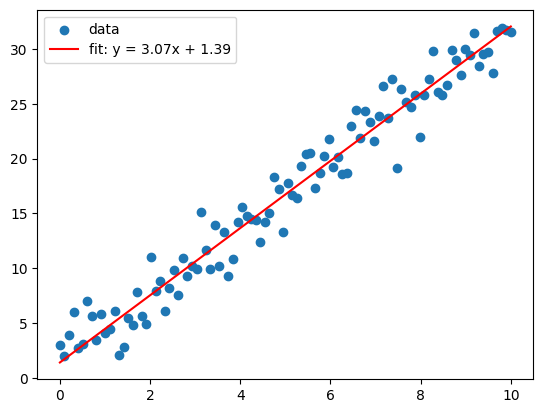

In [ ]:

# ! show the new trained slope and intercept compared to the data
plt.scatter(X, y, label='data')
plt.plot(X, predict(X, slope, intercept), label=f'fit: y = {slope:.2f}x + {intercept:.2f}', c='red')
plt.legend()
plt.show()